In [7]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
 # or any of the styles listed below



In [9]:
# Load dataset (update path if needed)
df = pd.read_csv("Supermart Grocery Sales - Retail Analytics Dataset.csv")

# Preview the first few rows
df.head()


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [6]:
import pandas as pd

# Replace with your actual path or filename
df = pd.read_csv("Supermart Grocery Sales - Retail Analytics Dataset.csv")

# Preview the data
df.head()


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [ ]:
# Check for data types and missing values
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [5]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Optional: set style for charts
plt.style.use('seaborn-v0_8-whitegrid')

# Load the dataset
df = pd.read_csv("Supermart Grocery Sales - Retail Analytics Dataset.csv")

# Preview first 5 rows
df.head()

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Check again
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   object        
 3   Sub Category   9994 non-null   object        
 4   City           9994 non-null   object        
 5   Order Date     4042 non-null   datetime64[ns]
 6   Region         9994 non-null   object        
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 859.0+ KB


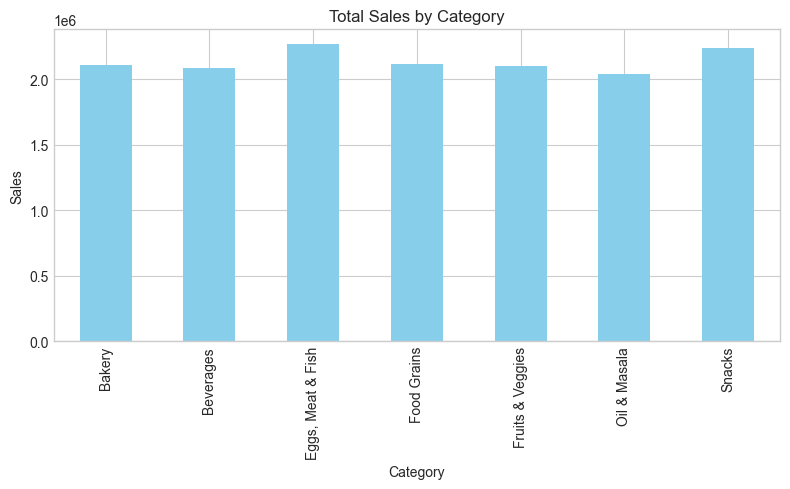

In [7]:
# Group by category and sum sales
sales_by_category = df.groupby("Category")["Sales"].sum()

# Plot
sales_by_category.plot(kind='bar', color='skyblue', figsize=(8,5))
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()


In [8]:
# Extract additional time features
df['Month_no'] = df['Order Date'].dt.month
df['Month'] = df['Order Date'].dt.strftime('%B')
df['Year'] = df['Order Date'].dt.year

df[['Order Date', 'Month', 'Month_no', 'Year']].head()


,Order Date,Month,Month_no,Year
0,2017-11-08,November,11.0,2017.0
1,2017-11-08,November,11.0,2017.0
2,2017-06-12,June,6.0,2017.0
3,2016-10-11,October,10.0,2016.0
4,2016-10-11,October,10.0,2016.0


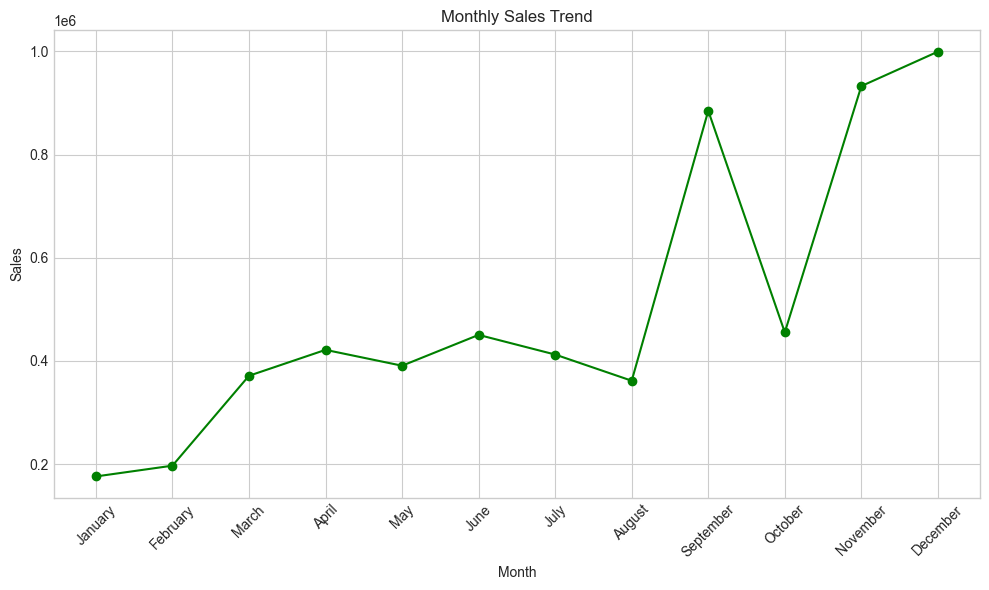

In [11]:
# Group by month number
monthly_sales = df.groupby('Month_no')['Sales'].sum().reset_index()

# Add month names for sorting
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales['Month'] = monthly_sales['Month_no'].apply(lambda x: month_names[int(x) - 1])


# Sort by month number
monthly_sales = monthly_sales.sort_values(by='Month_no')

# Plot
plt.figure(figsize=(10,6))
plt.plot(monthly_sales['Month'], monthly_sales['Sales'], marker='o', color='green')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


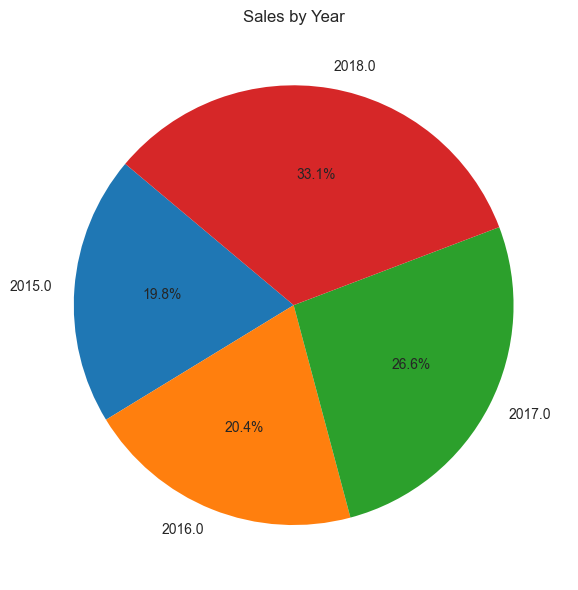

In [12]:
# Group by year
yearly_sales = df.groupby("Year")["Sales"].sum()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(yearly_sales, labels=yearly_sales.index, autopct='%1.1f%%', startangle=140)
plt.title("Sales by Year")
plt.tight_layout()
plt.show()


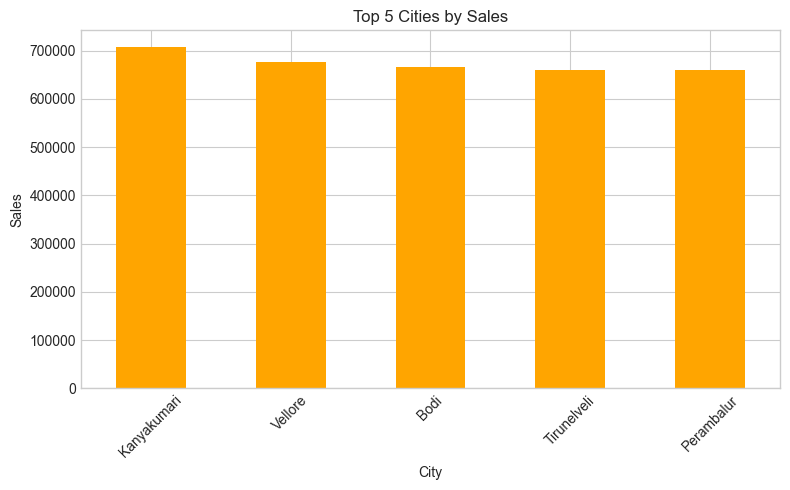

In [13]:
# Group by city and sort
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)
top_5_cities = city_sales.head(5)

# Plot
plt.figure(figsize=(8,5))
top_5_cities.plot(kind='bar', color='orange')
plt.title("Top 5 Cities by Sales")
plt.xlabel("City")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
